<a href="https://colab.research.google.com/github/johngonzalezv/machine-learning/blob/main/T3_Modelos_de_pron%C3%B3stico_en_el_sector_inmobiliario_de_Bogot%C3%A1_Modelos_lineales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de pronóstico en el sector inmobiliario de Bogotá
**John González**

![](https://d31dn7nfpuwjnm.cloudfront.net/images/valoraciones/0034/8136/casa-hipotecada-se-puede-vender.png?1565825047)

A partir de la información disponible en la página [metrocuadrado](https://www.metrocuadrado.com/) en esta actividad se pretende realizar los siguientes modelos de pronóstico de la vivienda en Bogotá:

1. Precio.
2. Tipo de inmueble.
3. Zona de ubicación.


## Configuración
Para este problema se importarán los paquetes:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Descargando y limpiando datos
Los datos de metrocuadrado se obtuvieron a partir de técnicas de webscraping, se seleccionaron las columnas más relevantes para esta actividad y se almacenaron en un archivo csv.

In [ ]:
datos = pd.read_csv('https://drive.google.com/uc?id=1jwQo5QLpdgfjqi17NV3t_nt6t8uuERgJ', index_col=0)

,mtipoinmueble,mvalorventa,marea,mnrocuartos,mnrobanos,mnrogarajes,mzona,mbarrio,mnombrecomunbarrio
0,Apartamento,385000000,100.0,3,2,1.0,Chapinero,ALFONSO LOPEZ,GALERIAS
1,Apartamento,190810000,34.0,1,2,1.0,Norte,EL CODITO,EL REDIL
2,Apartamento,720000000,157.0,3,4,2.0,Noroccidente,NIZA SUBA,Cerros De Niza
3,Casa,1018660600,173.0,3,4,1.0,Otros,NaN,NaN
4,Apartamento,1850000000,190.0,3,4,2.0,Norte,CERROS DE LOS ALPES,CERROS DE LOS ALPES
...,...,...,...,...,...,...,...,...,...
245,Apartamento,580000000,0.0,2,3,2.0,Norte,SANTA BARBARA OCCIDENTAL,Santa Barbara Occidental-Usaquén
246,Casa,330000000,72.0,3,2,1.0,Norte,LA LIBERIA,LAS MARGARITAS
247,Casa,1200000000,400.0,3,4,3.0,Norte,EL CONTADOR,El Contador
248,Casa,642000000,191.0,4,4,2.0,Noroccidente,CIUDAD JARDIN NORTE,Gratamira


Una vez los datos se han cargado, se ajusta cada variable para que su tipo corresponda con los valores.

In [ ]:
# Las siguientes variables contienen valores 5+ indicando que hay mas de 5.
# En tal caso se pasan a 6 y se convierte a tipo float
datos['mnrocuartos'] = datos.mnrocuartos.apply(lambda x: 6 if x=='5+' else x).astype(float)
datos['mnrobanos'] = datos.mnrobanos.apply(lambda x: 6 if x=='5+' else x).astype(float)

# Las siguientes variables se pasan a tipo categórico
datos['mzona'] = datos.mzona.astype('category')
datos['mbarrio']= datos.mbarrio.astype('category')
datos['mnombrecomunbarrio'] = datos.mnombrecomunbarrio.astype('category')
datos['mtipoinmueble'] = datos.mtipoinmueble.astype('category')

# Se muestra la información de las variables
datos.info()

# Se eliminan los registros que tengan al menos un valor nulo y la primer columna Unnamed: 0
datos.dropna(inplace = True)
# datos.drop(columns = 'Unnamed: 0', inplace = True)

# Y se presentan los datos
datos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 249
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   mtipoinmueble       10000 non-null  category
 1   mvalorventa         10000 non-null  int64   
 2   marea               10000 non-null  float64 
 3   mnrocuartos         9993 non-null   float64 
 4   mnrobanos           10000 non-null  float64 
 5   mnrogarajes         9945 non-null   float64 
 6   mzona               9812 non-null   category
 7   mbarrio             9945 non-null   category
 8   mnombrecomunbarrio  9866 non-null   category
dtypes: category(4), float64(4), int64(1)
memory usage: 586.8 KB


,mtipoinmueble,mvalorventa,marea,mnrocuartos,mnrobanos,mnrogarajes,mzona,mbarrio,mnombrecomunbarrio
0,Apartamento,385000000,100.0,3.0,2.0,1.0,Chapinero,ALFONSO LOPEZ,GALERIAS
1,Apartamento,190810000,34.0,1.0,2.0,1.0,Norte,EL CODITO,EL REDIL
2,Apartamento,720000000,157.0,3.0,4.0,2.0,Noroccidente,NIZA SUBA,Cerros De Niza
4,Apartamento,1850000000,190.0,3.0,4.0,2.0,Norte,CERROS DE LOS ALPES,CERROS DE LOS ALPES
5,Apartamento,210000000,52.0,3.0,1.0,1.0,Noroccidente,GILMAR,COLINA GILMAR
...,...,...,...,...,...,...,...,...,...
245,Apartamento,580000000,0.0,2.0,3.0,2.0,Norte,SANTA BARBARA OCCIDENTAL,Santa Barbara Occidental-Usaquén
246,Casa,330000000,72.0,3.0,2.0,1.0,Norte,LA LIBERIA,LAS MARGARITAS
247,Casa,1200000000,400.0,3.0,4.0,3.0,Norte,EL CONTADOR,El Contador
248,Casa,642000000,191.0,4.0,4.0,2.0,Noroccidente,CIUDAD JARDIN NORTE,Gratamira


En seguida se muestran los gráfico univariados de algunas variables de la tabla de datos

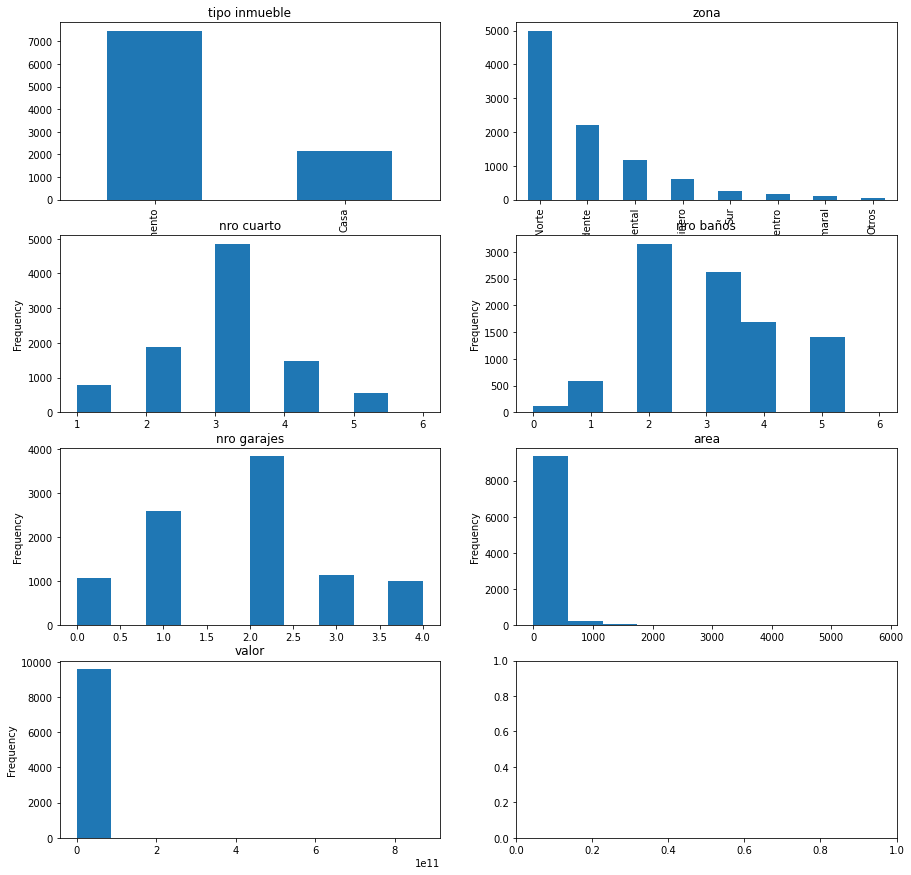

In [ ]:
fig, axs = plt.subplots(4,2, figsize=(15,15))
datos.mtipoinmueble.value_counts().plot.bar(ax = axs[0,0], title = 'tipo inmueble')
datos.mzona.value_counts().plot.bar(ax = axs[0,1], title = 'zona')
datos.mnrocuartos.plot.hist(ax = axs[1,0], title = 'nro cuarto')
datos.mnrobanos.plot.hist(ax = axs[1,1], title = 'nro baños')
datos.mnrogarajes.plot.hist(ax = axs[2,0], title = 'nro garajes')
datos.marea.plot.hist(ax = axs[2,1], title = 'area')
datos.mvalorventa.plot.hist(ax = axs[3,0], title = 'valor')
plt.show()

## Actividad 1: Pronóstico del precio

Se intuye que el precio se asocia al área. Por tal motivo se iniciará con un modelo de regresión lineal con el área como variable dependiente. La gráfica que representa estas dos variables es la siguiente.

Text(0.5, 0, 'Area ($m^2$)')

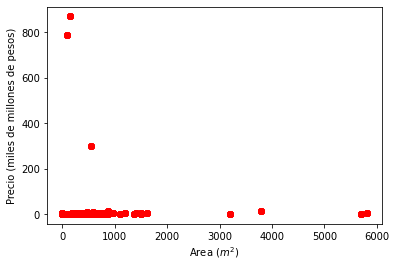

In [ ]:
plt.plot(datos['marea'], datos['mvalorventa']/1e9, 'ro')
plt.ylabel('Precio (miles de millones de pesos)')
plt.xlabel('Area ($m^2$)')

In [ ]:
datos = datos.drop_duplicates().reset_index().drop(columns='index')

Como se puede observar existen viviendas cuyo precio y área es muy alta en comparación con las demás y parece que no son representativas. Por tal motivo se filtran los datos para que no contengan estos registros.

In [ ]:
# Se crea el filtro
filtro = ((datos.marea < 1750) & 
          (datos.marea > 1) & 
          (datos.mnrobanos != 0) & 
          (datos.mvalorventa > 1e8) &
          (datos.mvalorventa < 1e10)
)

# Se filtran los datos
datos_filtro = datos[filtro]
print('cantidad de registros en datos filtrados', len(datos_filtro))

,mtipoinmueble,mvalorventa,marea,mnrocuartos,mnrobanos,mnrogarajes,mzona,mbarrio,mnombrecomunbarrio
0,Apartamento,385000000,100.0,3.0,2.0,1.0,Chapinero,ALFONSO LOPEZ,GALERIAS
1,Apartamento,190810000,34.0,1.0,2.0,1.0,Norte,EL CODITO,EL REDIL
2,Apartamento,720000000,157.0,3.0,4.0,2.0,Noroccidente,NIZA SUBA,Cerros De Niza
3,Apartamento,1850000000,190.0,3.0,4.0,2.0,Norte,CERROS DE LOS ALPES,CERROS DE LOS ALPES
4,Apartamento,210000000,52.0,3.0,1.0,1.0,Noroccidente,GILMAR,COLINA GILMAR
...,...,...,...,...,...,...,...,...,...
1715,Apartamento,106000000,42.0,2.0,1.0,0.0,Occidental,CAMPO ALEGRE,EL TINTAL
1717,Casa,330000000,72.0,3.0,2.0,1.0,Norte,LA LIBERIA,LAS MARGARITAS
1718,Casa,1200000000,400.0,3.0,4.0,3.0,Norte,EL CONTADOR,El Contador
1719,Casa,642000000,191.0,4.0,4.0,2.0,Noroccidente,CIUDAD JARDIN NORTE,Gratamira


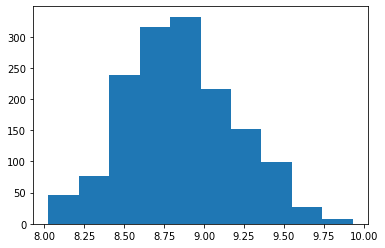

In [ ]:
plt.hist(np.log10(datos_filtro.mvalorventa))
plt.show()

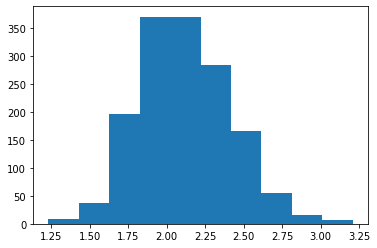

In [ ]:
plt.hist(np.log10(datos_filtro.marea))
plt.show()

En seguida se presenta una gráfica de dispersión con los datos filtrados

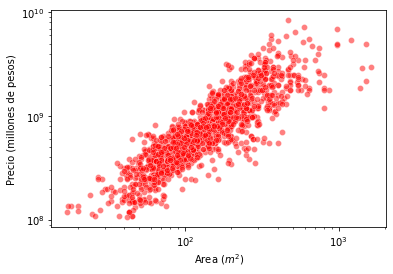

In [ ]:
grid = sns.scatterplot(x='marea', y='mvalorventa',
                       data=datos_filtro, alpha=0.5, color = 'red')
grid.set(xscale="log", yscale="log")
plt.ylabel('Precio (millones de pesos)')
plt.xlabel('Area ($m^2$)')
plt.show()

## División de base de datos

In [ ]:
from sklearn.model_selection import train_test_split
from patsy import dmatrices

def train_test_split_vars(specification, data):
  df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
  y_train, X_train = dmatrices(specification, data=df_train)
  y_test, X_test = dmatrices(specification, data=df_train)
  return X_train, X_test, y_train, y_test


## 1. Modelo lineal simple

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
specification = 'np.log10(mvalorventa) ~ np.log10(marea)'
X_train, X_test, y_train, y_test = train_test_split_vars(specification, datos_filtro)
modelo1 = sm.OLS(y_train, X_train).fit()
print(modelo1.summary())

                              OLS Regression Results                             
Dep. Variable:     np.log10(mvalorventa)   R-squared:                       0.761
Model:                               OLS   Adj. R-squared:                  0.761
Method:                    Least Squares   F-statistic:                     3835.
Date:                   Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                           18:06:06   Log-Likelihood:                 447.80
No. Observations:                   1208   AIC:                            -891.6
Df Residuals:                       1206   BIC:                            -881.4
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept   

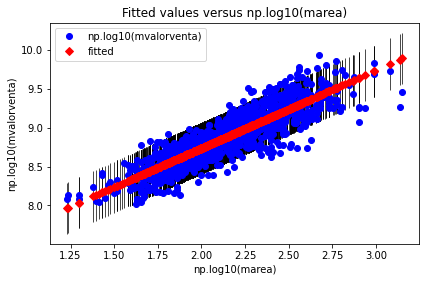

In [ ]:
fig = sm.graphics.plot_fit(modelo1, 'np.log10(marea)')
fig.tight_layout(pad=1.0)

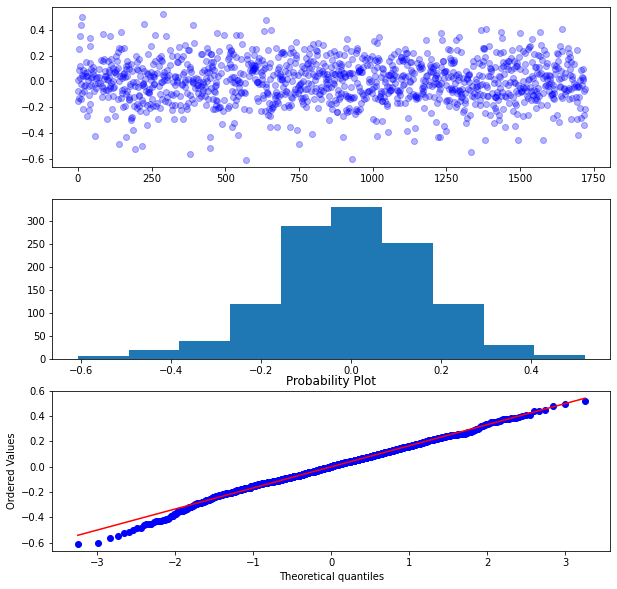

In [ ]:
def plot_residuals(y_true, y_pred):
  fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 10))
  residuals = y_true - y_pred
  ax1.plot(residuals, 'bo', alpha = 0.3)
  ax2.hist(residuals)
  sp.stats.probplot(residuals.to_list(), plot = ax3, fit=True)
  plt.show()

plot_residuals(np.log10(df_train.mvalorventa), modelo1.fittedvalues)

Y finalmente, se evalúa el desempeño del modelo mediante la función `mean_squared_error` de `sklearn`, la cual compara el precio real de la vivienda y su pronóstico.
$$mean\_squared\_error = \sqrt{\frac{1}{n}\sum\left(y_{true} - y_{pred}\right)^2}$$

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, modelo1.predict(X_test), squared = False)
print('El error medio del logaritmo es:', round(mse,2))

El error medio del logaritmo es: 0.17


## Modelo lineal con variable categórica

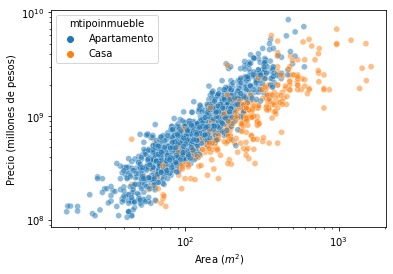

In [ ]:
grid = sns.scatterplot(x='marea', y='mvalorventa', hue = 'mtipoinmueble',
                       data=datos_filtro, alpha=0.5)
grid.set(xscale="log", yscale="log")
plt.ylabel('Precio (millones de pesos)')
plt.xlabel('Area ($m^2$)')
plt.show()

In [ ]:
specification = 'np.log10(mvalorventa) ~ np.log10(marea) + mtipoinmueble'
X_train, X_test, y_train, y_test = train_test_split_vars(specification, datos_filtro)
modelo2 = sm.OLS(y_train, X_train).fit()
print(modelo2.summary())

                              OLS Regression Results                             
Dep. Variable:     np.log10(mvalorventa)   R-squared:                       0.825
Model:                               OLS   Adj. R-squared:                  0.825
Method:                    Least Squares   F-statistic:                     2839.
Date:                   Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                           18:07:35   Log-Likelihood:                 636.44
No. Observations:                   1208   AIC:                            -1267.
Df Residuals:                       1205   BIC:                            -1252.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


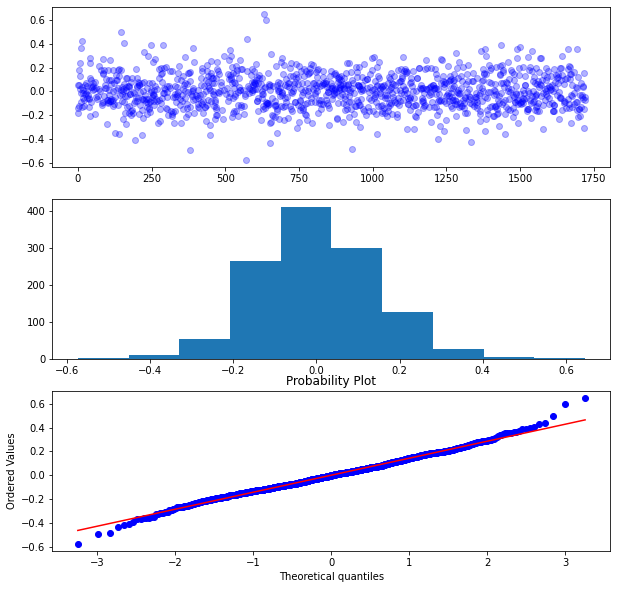

In [ ]:
plot_residuals(np.log10(df_train.mvalorventa), modelo2.fittedvalues)

In [ ]:
mse = mean_squared_error(y_test, modelo2.predict(X_test), squared = False)
print('El error medio del logaritmo es:', round(mse,2))

El error medio del logaritmo es: 0.14


## Modelo lineal múltiple

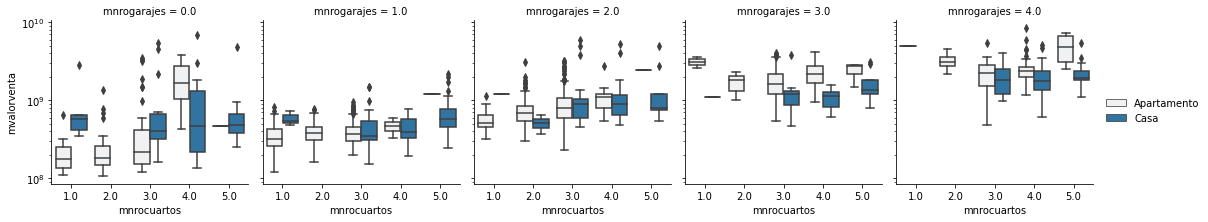

In [ ]:
g = sns.FacetGrid(datos_filtro, col = 'mnrogarajes')
g.map_dataframe(sns.boxplot, x='mnrocuartos', y='mvalorventa', hue = 'mtipoinmueble')
g.set(yscale="log")
g.add_legend()
g.set_axis_labels("mnrocuartos", "mvalorventa")
plt.show()

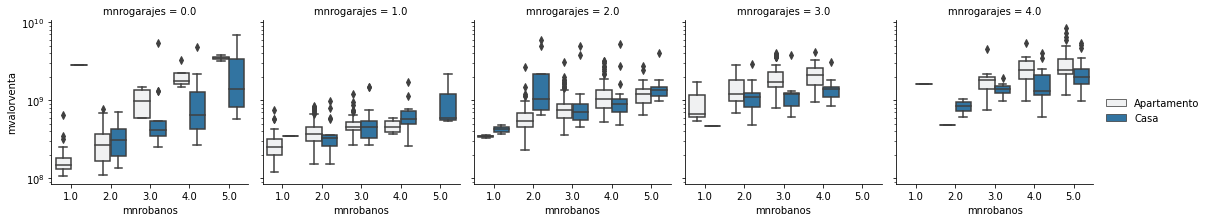

In [ ]:
g = sns.FacetGrid(datos_filtro, col = 'mnrogarajes')
g.map_dataframe(sns.boxplot, x='mnrobanos', y='mvalorventa', hue = 'mtipoinmueble')
g.set(yscale="log")
g.add_legend()
g.set_axis_labels("mnrobanos", "mvalorventa")
plt.show()

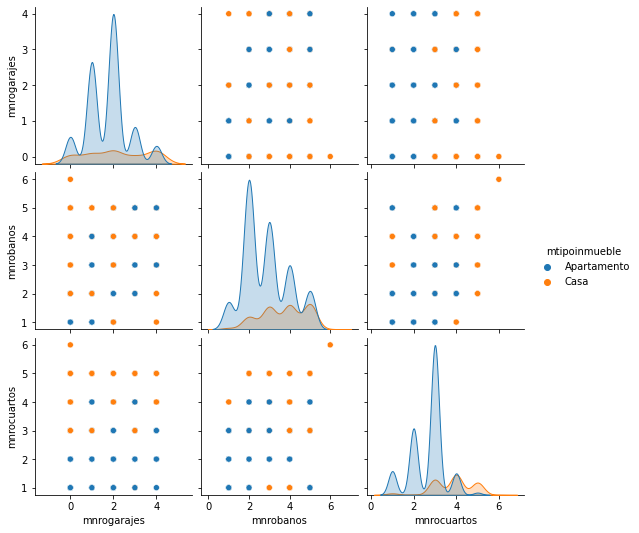

In [ ]:
sns.pairplot(datos_filtro[['mnrogarajes', 'mnrobanos', 'mnrocuartos', 'mtipoinmueble']],
             hue="mtipoinmueble")

In [ ]:
specification = 'np.log10(mvalorventa) ~ np.log10(marea) + mtipoinmueble + mnrobanos + mnrogarajes + mnrocuartos'
X_train, X_test, y_train, y_test = train_test_split_vars(specification, datos_filtro)
modelo3 = sm.OLS(y_train, X_train).fit()
print(modelo3.summary())

                              OLS Regression Results                             
Dep. Variable:     np.log10(mvalorventa)   R-squared:                       0.867
Model:                               OLS   Adj. R-squared:                  0.866
Method:                    Least Squares   F-statistic:                     1560.
Date:                   Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                           18:10:42   Log-Likelihood:                 800.14
No. Observations:                   1208   AIC:                            -1588.
Df Residuals:                       1202   BIC:                            -1558.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


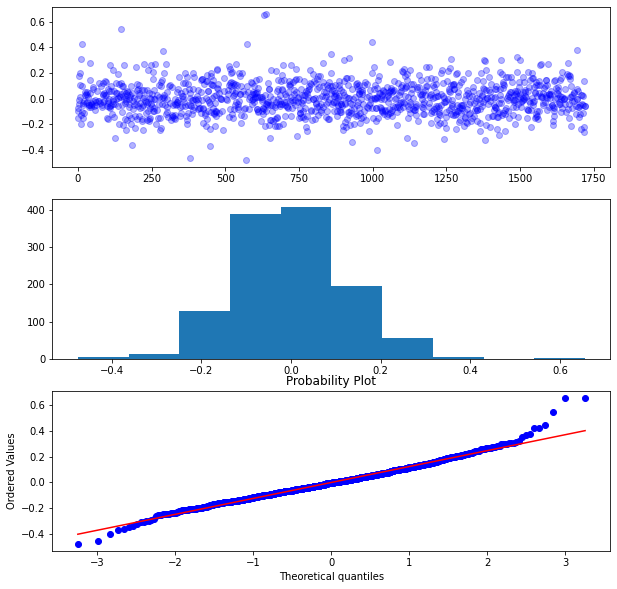

In [ ]:
plot_residuals(np.log10(df_train.mvalorventa), modelo3.fittedvalues)

In [ ]:
mse = mean_squared_error(y_test, modelo3.predict(X_test), squared = False)
print('El error medio del logaritmo es:', round(mse,2))

El error medio del logaritmo es: 0.12


Ahora, podemos proponer un primer modelo lineal entre el precio y el área para este conjunto de datos. Se realizará de dos maneras diferentes. El método analítico usando la ecuación normal y el método aproximado usando el gradiente descendente.

## Modelo polinómico

In [ ]:
specification = 'np.log10(mvalorventa) ~ I(marea)+ I(marea**2) + mtipoinmueble'
X_train, X_test, y_train, y_test = train_test_split_vars(specification, datos_filtro)
modelo5 = sm.OLS(y_train, X_train).fit()
print(modelo5.summary())

                              OLS Regression Results                             
Dep. Variable:     np.log10(mvalorventa)   R-squared:                       0.773
Model:                               OLS   Adj. R-squared:                  0.772
Method:                    Least Squares   F-statistic:                     1363.
Date:                   Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                           18:19:22   Log-Likelihood:                 478.19
No. Observations:                   1208   AIC:                            -948.4
Df Residuals:                       1204   BIC:                            -928.0
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


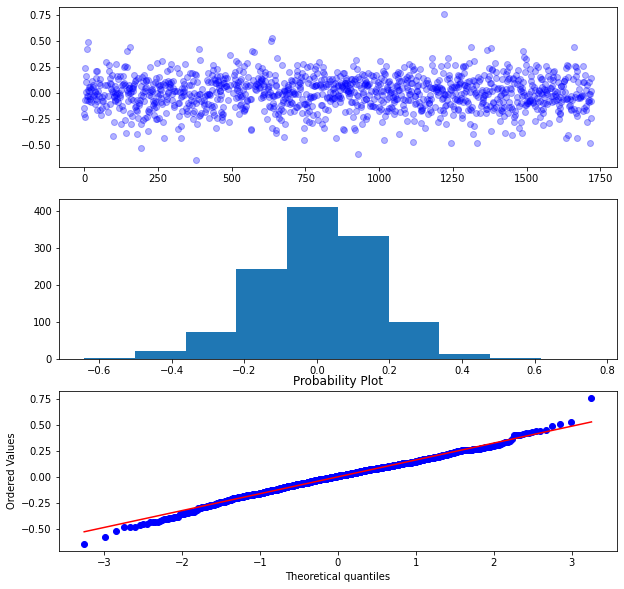

In [ ]:
plot_residuals(np.log10(df_train.mvalorventa), modelo5.fittedvalues)

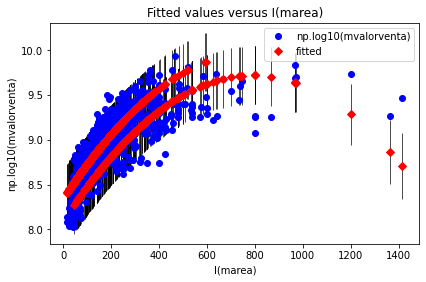

In [ ]:
fig = sm.graphics.plot_fit(modelo5, 'I(marea)')
fig.tight_layout(pad=1.0)

In [ ]:
mse = mean_squared_error(y_test, modelo5.predict(X_test), squared = False)
print('El error medio del logaritmo es:', round(mse,2))

El error medio del logaritmo es: 0.16


# Segundo Punto

In [ ]:
datos = {'Valencia':[299,313,300,321,308,312,300,310,281,308,309,300,303,303,311,308,291,298,276,
290,310,308,295,310,286,295,289,293,291,297,297,287,297,302,298,301,313,290,306,313,294,
308,295,303,316,299,313,296,290,299],
'Castellon':[252,248,232,229,256,233,240,237,248,232,230,246,236,250,238,243,245,241,235,
249,238,231,230,239,261,243,242,245,249,258,245,236,244,242,229,246,244,244,255,247,236,
252,237,259,248,237,236,252,236,239],
'Alicante':[272,268,285,274,278,287,297,275,269,281,270,284,282,281,280,286,265,283,281,272,
269,286,268,288,284,282,304,280,283,281,281,286,287,288,278,272,268,287,269,272,270,271,
291,265,280,280,275,294,269,277]}

,province,wage
0,Valencia,299
1,Valencia,313
2,Valencia,300
3,Valencia,321
4,Valencia,308
...,...,...
145,Alicante,280
146,Alicante,275
147,Alicante,294
148,Alicante,269


### A. Create 2 variables

In [ ]:
df = pd.melt(pd.DataFrame(datos), var_name='province', value_name='wage')
df['province'] = df['province'].astype('category')
df['wage'] = df['wage'].astype(int)
df

,province,wage
0,Valencia,299
1,Valencia,313
2,Valencia,300
3,Valencia,321
4,Valencia,308
...,...,...
145,Alicante,280
146,Alicante,275
147,Alicante,294
148,Alicante,269


## B. Description

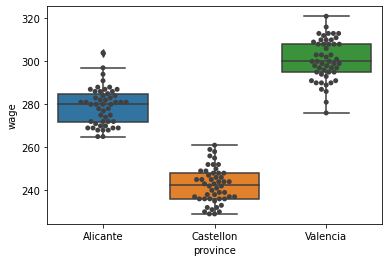

In [ ]:
ax = sns.boxplot(x = 'province', y = 'wage', data = df)
ax = sns.swarmplot(x = 'province', y = 'wage', data = df, color=".25")

In [ ]:
df.groupby('province').var().reset_index()

,province,wage
0,Alicante,73.846939
1,Castellon,67.714286
2,Valencia,91.541224


In [ ]:
df.groupby('province').mean().reset_index()

,province,wage
0,Alicante,279.10
1,Castellon,242.40
2,Valencia,300.64


## C. ANOVA

In [ ]:
# y, X = dmatrices('wage ~ province-1', data=df)
model = smf.ols('wage ~ C(province)-1', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     558.0
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           2.21e-69
Time:                        19:20:53   Log-Likelihood:                -537.79
No. Observations:                 150   AIC:                             1082.
Df Residuals:                     147   BIC:                             1091.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(province)[Alicante]    279

(array([ 1.,  1., 22., 25., 25., 31., 28., 10.,  5.,  2.]),
 array([-24.64 , -19.686, -14.732,  -9.778,  -4.824,   0.13 ,   5.084,
         10.038,  14.992,  19.946,  24.9  ]),
 <a list of 10 Patch objects>)

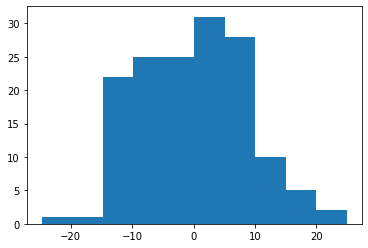

In [ ]:
plt.hist(model.resid)

In [ ]:
table = sm.stats.anova_lm(model)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(province),3.0,11351948.98,3.783983e+06,48699.398182,4.486578e-220
Residual,147.0,11422.02,7.770082e+01,NaN,NaN


Con una signficancia de 5% hay suficiente evidencia de la diferencia de medias de los tres grupos

## D. Explicación ANOVA
El valor F es 48699, los grados de libertad de la prueba ANOVA son 3. Los grados de libertad de los residuales son 147.

In [ ]:
from scipy.stats import f
f.ppf(0.95,3,147) # Valor crítico

2.6661487758521765

## F. Varianza común

In [ ]:
table.loc['Residual', 'sum_sq']/table.loc['Residual', 'df']

77.70081632653059

## I. Prueba Tukey

In [ ]:
import statsmodels.stats.multicomp as multi 

mcDate = multi.MultiComparison(df.wage, df.province)
Results = mcDate.tukeyhsd()
print(Results)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj  lower    upper   reject
-----------------------------------------------------------
 Alicante Castellon    -36.7 0.001 -40.8745 -32.5255   True
 Alicante  Valencia    21.54 0.001  17.3655  25.7145   True
Castellon  Valencia    58.24 0.001  54.0655  62.4145   True
-----------------------------------------------------------


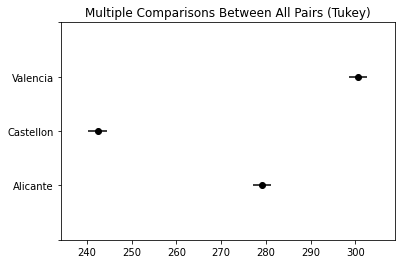

In [ ]:
Results.plot_simultaneous(figsize=(6,4))
plt.show()